<a href="https://colab.research.google.com/github/Shourya306/Supervised-Machine-Learning---Regression-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.




```
Project Agenda:

* Data Description.

* Defining the problem statement.

* Data Preprocessing.

* Exploratory Data Analysis.

* Linear Regression.

* Regularised Regression.

* Hyperparameter Tuning.

* Conclusion.
```



## <b> Data Description. </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [3]:
# Importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.linear_model import Lasso,Ridge,ElasticNet


import warnings
warnings.filterwarnings('ignore')  # Code to not show me any warnings that might arise.

pd.set_option('max_columns', None) # Code to make sure pandas shows me all the columns.

In [4]:
# Mounting my drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Reading in the dataset.
# Encoded with "latin-1" because the default encoding wasn't able to encode the large file. 
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike Sharing Demand Prediction - Challa Shourya Chandra Sai./Copy of SeoulBikeData.csv',encoding ='latin')

In [6]:
# Viewing the first 5 rows.
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# Viewing the last 5 rows.
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
# Understading the datatype of the columns.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
# Understanding basic stats.
dataset.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [10]:
# Checking the shape of the dataset.
dataset.shape

(8760, 14)

## **Defining The Problem Statement.**

*Understanding the difference between continous variables and discrete variables.*

**Continous variables** - These are those variables whose values are obtained by measuring. They can assume any value between an interval.

**Descrite variables** - These are those variables whose values are obtained by counting. They can assume distinct set of values.

*Why Choose Linear Regression to model the data?*

Linear Regression is used to model the data because we want to predict the **dependent variable(y)** which is continous in nature.

*Segregating the variables into **dependent & independent** variables[categorical or continous/Discrite.].*

Dependent variable(Y): **Rented Bike Count**

Independent variable(X):

  * Date = Breaking the column into 3 seperate columns - Day, Month, Year. Treating each column as a categorical variable.

  * Hour = Numeric Discrite variable.

  * Temperature(°C) = Continous Variable.

  * Humidity(%) = Continous Variable.

  * Wind speed (m/s) = Continous Variable.

  * Visibility(10m) = Continous Variable.

  * Dew point temperature(°C) = Continous Variable.

  * Solar Radiation (MJ/m2) = Continous Variable.

  * Rainfall(mm) = Continous Variable.

  * Snowfall(cm) = Continous Variable.

  * Seasons = Categorical Variable of 4 classes.

  * Holiday = Categorical Variable of 2 classes.

  * Functioning Day = Categorical Variable of 2 classes.


## **Data Preprocessing.**

Checking if there are any duplicate values in the dataset.

In [11]:
dataset[dataset.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


**We can see that there aren't any duplicate values in the dataset. It is essential to remove dublicate values in the dataset for our model to generalize the unseen data.**

Checking for null values.

In [12]:
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Thank god! there aren't any null values.**

**Note:** I will be removing outliers at a later stage and not now in the preprocessing stage.

Working on the date column.

In [13]:
# Converting the Date column dtype to datetime so that we can extract the month and the year from the date column.
dataset['Date'] = dataset['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [14]:
# Extracting the year, month, day from date.
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day_name()

In [15]:
# Creating a new column from day column.
dataset['Is_Weekend']=dataset['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

In [16]:
# Dropping the day and date column.
dataset.drop(['day','Date'], inplace = True, axis = 1)

In [17]:
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,Is_Weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0


In [18]:
# Checking the value counts of descrite numeric values.
dataset['year'].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

In [19]:
dataset['month'].value_counts()

12    744
1     744
3     744
5     744
7     744
8     744
10    744
4     720
6     720
9     720
11    720
2     672
Name: month, dtype: int64

In [20]:
dataset['Hour'].value_counts()

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

In [21]:
# Understanding the datatypes of the variables.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  year                       8760 non-null   int64

**Approach used to deal with numeric discrete data**: When you have numeric discrete data in your dataset, then you can as numeric data or you can convert them into categorical data.

If the numeric discrete data doesn't have a strong linear relationship them dependent variable then i will convert them into categories.

Converting them into categories is important early on because you don't want these variables to be used while potting correlation plot.

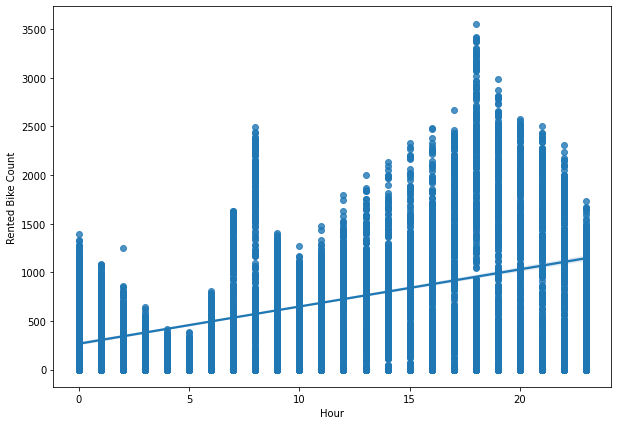

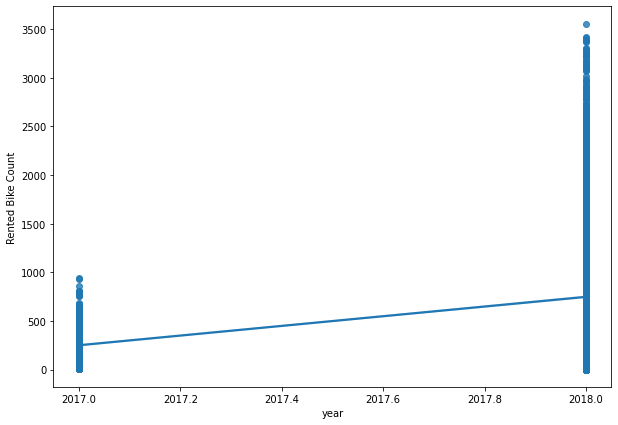

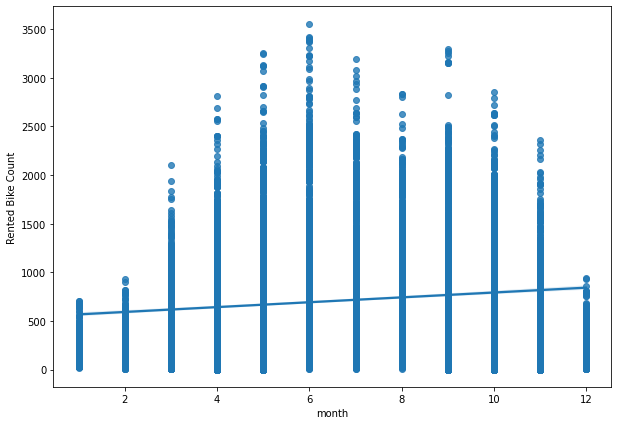

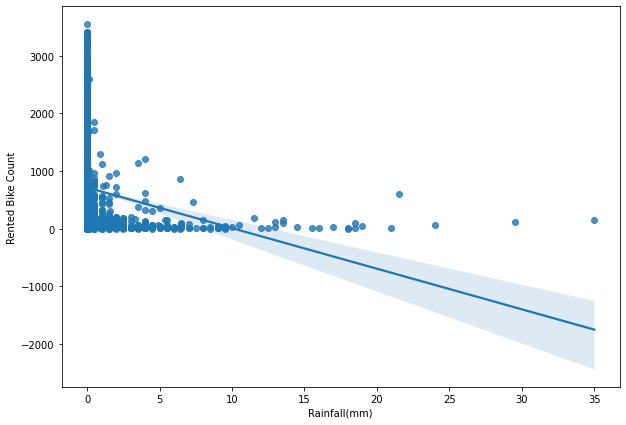

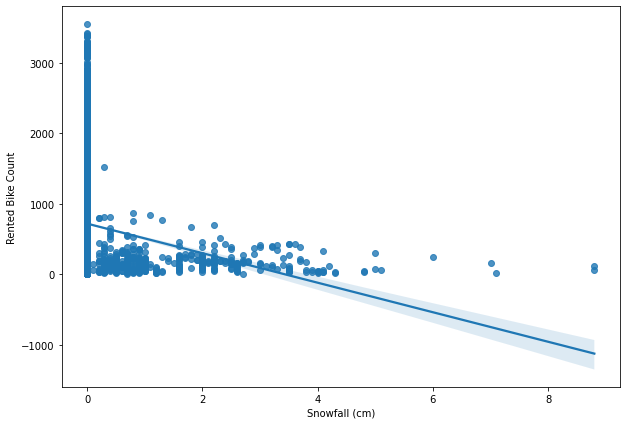

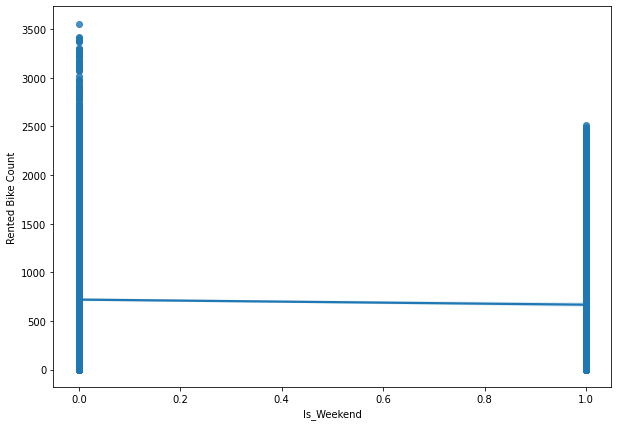

In [22]:
# Understanding the linear relationship between the numeric discrete variables and y variable.
category_columns = ['Hour','year','month','Rainfall(mm)','Snowfall (cm)','Is_Weekend']
for col in category_columns:
  fig = plt.figure(figsize = (10,7))
  ax = plt.gca()
  sns.regplot(x = dataset[col], y = dataset['Rented Bike Count'])
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')

As you can see from the above plots, the columns don't have a strong linear relationship with y variable. So converting them into category datatype.

In [23]:
# Converting the datatype of numeric discrete columns into a category datatype.
dataset['year'] = dataset['year'].astype('category')
dataset['month'] = dataset['month'].astype('category')
dataset['Hour'] = dataset['Hour'].astype('category')
dataset['Rainfall(mm)'] = dataset['Rainfall(mm)'].astype('category')
dataset['Snowfall (cm)'] = dataset['Snowfall (cm)'].astype('category')
dataset['Is_Weekend'] = dataset['Is_Weekend'].astype('category')

Remaming the columns the dataset.

In [24]:
dataset.rename(columns = {'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility',
                          'Dew point temperature(°C)':'Dew point temperature','Solar Radiation (MJ/m2)':'Solar Radiation','Rainfall(mm)':'Rainfall',
                          'Snowfall (cm)':'Snowfall'}, inplace = True)

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented Bike Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew point temperature  8760 non-null   float64 
 7   Solar Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   category
 9   Snowfall               8760 non-null   category
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning Day        8760 non-null   object  
 13  year                   8760 non-null   category
 14  month                  8760 non-null   c

## **Exploratory Data Analysis.**

Exploratory Data Analysis is performed to understand the relationship between independent variables and dependent variable.



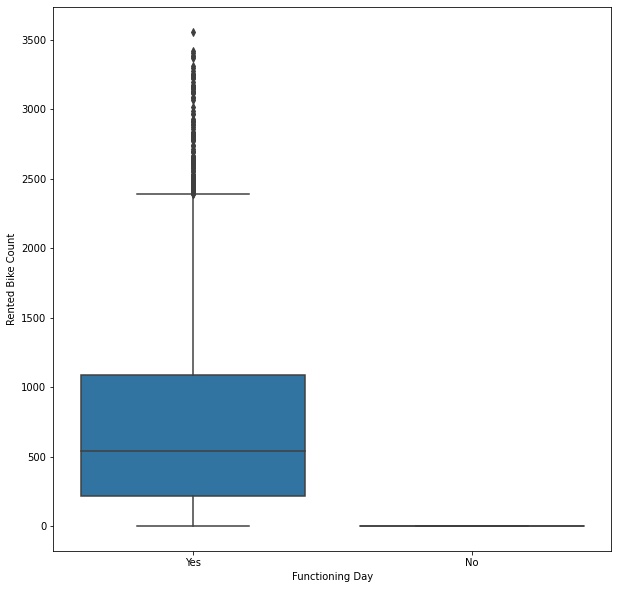

In [26]:
# Plotting a boxplot to understand the distribution of Y variable with respect to functioning day.
plt.figure(figsize = (10,10))
sns.boxplot(x = dataset['Functioning Day'], y = dataset['Rented Bike Count'],data = dataset)

From the above box plot, we can see that there are a lot of bikes available for sharing when it's a functioning day. And there are hardly any bikes when it isn't a functioning day.

**Hypothesis** - The use of bikes will be low when the snowfall is high. 

Text(0.5, 1.0, 'Snowfall vs Rented Bike')

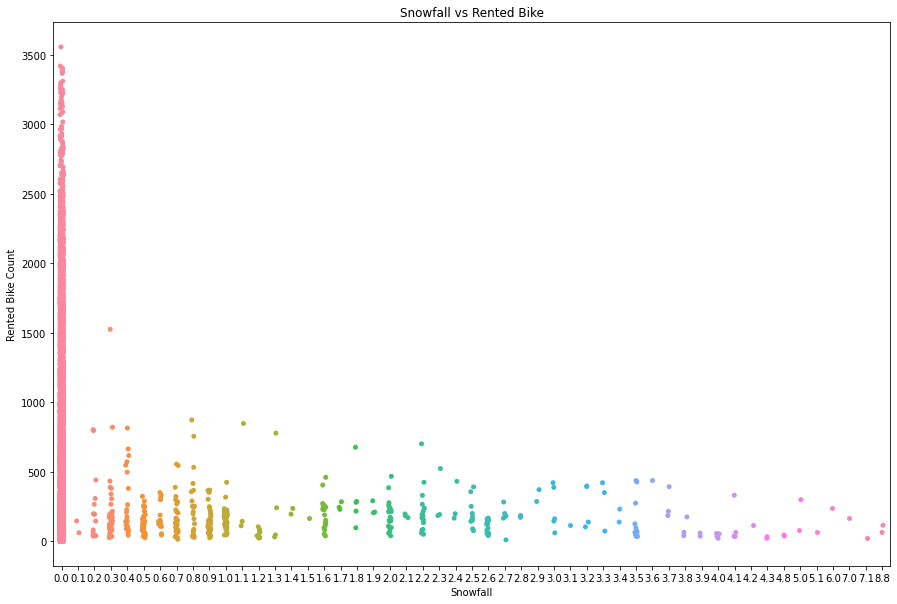

In [27]:
# Plotting a stripplot on snowfall vs rented bike plot
plt.figure(figsize = (15,10))
sns.stripplot(x = dataset['Snowfall'], y = dataset['Rented Bike Count'], data = dataset)
plt.title('Snowfall vs Rented Bike')

**Analysis** - Yayy!! my hypothesis was indeed ture.

**Hypothesis** - Mornings and Evenings we might see the usage of bike augment. The working population might be using these to commute to work.

Text(0.5, 1.0, 'Hour vs Rented Bike')

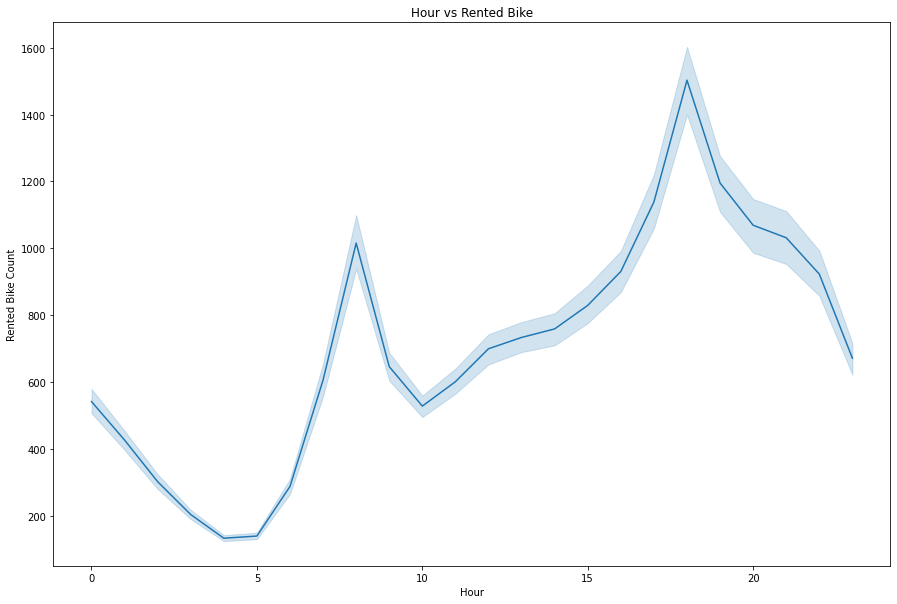

In [28]:
# Plotting a line plot on hour vs rented bike count
plt.figure(figsize = (15,10))
sns.lineplot(x = dataset['Hour'], y = dataset['Rented Bike Count'], data = dataset)
plt.title('Hour vs Rented Bike')

**Analysis** - My hypothesis is right, we can see the usage of bikes is more the mornings and evenings.

**Hypothesis** - Summer Months viz. March, April, May, June will see a rise in the usage of bikes because teenagers might use it during their summer breaks.

Text(0.5, 1.0, 'Month vs Rented Bike')

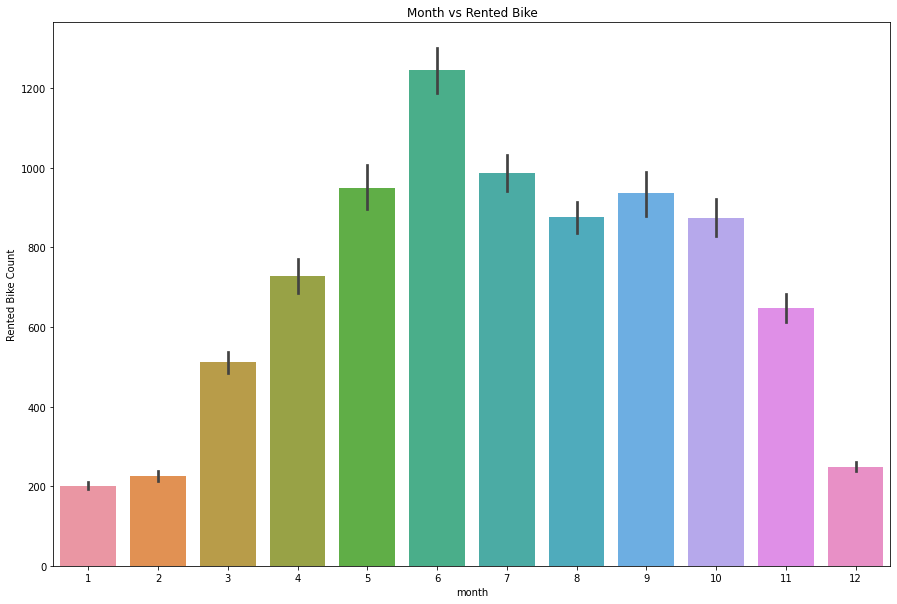

In [29]:
# Plotting a barplot on month vs rented bike
plt.figure(figsize = (15,10))
sns.barplot(x = dataset['month'], y = dataset['Rented Bike Count'], data = dataset)
plt.title('Month vs Rented Bike')

**Analysis** - My hypothesis was right, Usage of bikes are high on March, April, May, and June.

**Hypothesis** - Usage of bikes during summer will be more when compared to other months.

Text(0.5, 1.0, 'Seasons vs Rented Bike')

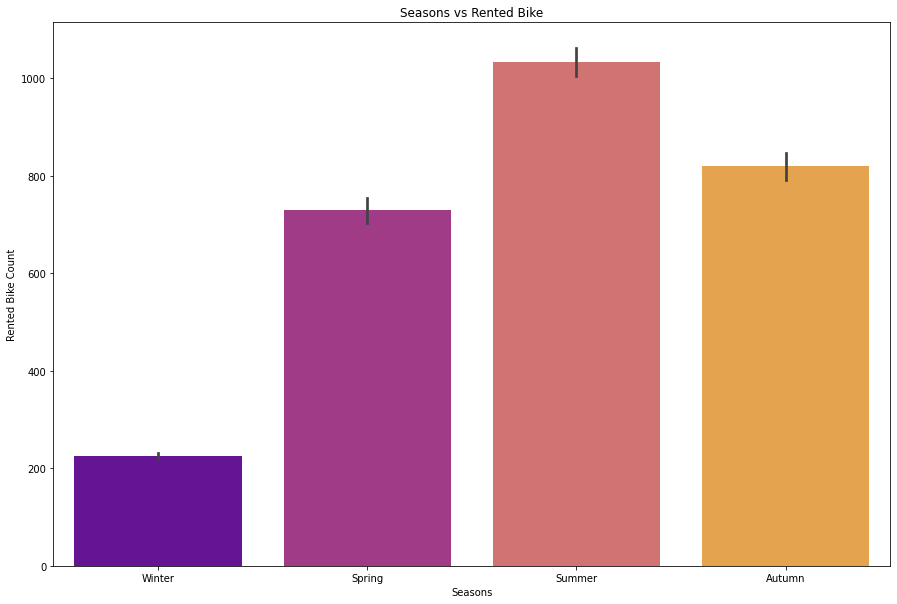

In [30]:
# Plotting a barplot on Seasons vs Rented Bike
plt.figure(figsize=(15,10))
sns.barplot(x = dataset['Seasons'], y = dataset['Rented Bike Count'], data = dataset, palette ='plasma')
plt.title('Seasons vs Rented Bike')

**Analysis** - My Hypothesis is correct.

**Hypothesis** - Usage of bikes might be more during the working days as the population might use these bikes for commuting to work.

Text(0.5, 1.0, 'Holiday vs Rented Bike')

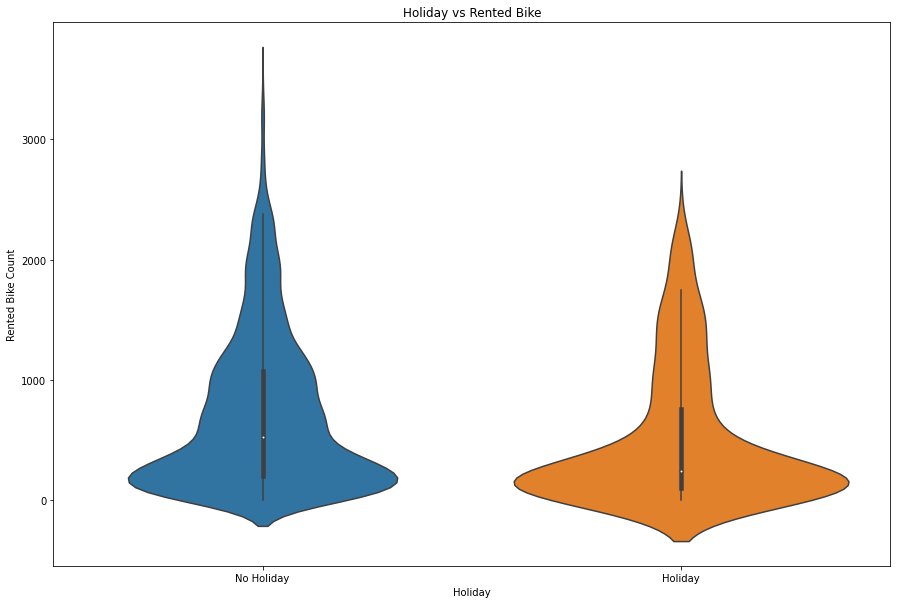

In [31]:
# Plotting a voilin plot on Holiday vs Rented Bike.
plt.figure(figsize = (15,10))
sns.violinplot(x = dataset['Holiday'], y = dataset['Rented Bike Count'], data = dataset)
plt.title('Holiday vs Rented Bike')

**Analysis** - My Hypothesis is correct.

## **Linear Regression.**

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and 
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

* The distributions of the variables should be normal.

* Independent variables should show linear relationship with dv.

* No multicollinearity in the dataset.

* Residual mean should be 0 or close to 0.

* Distribution of the residuals should be normal.

* There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.

**Before Implemeting the linear regression, we will be making sure that all the assumptions of linear regression are met.**


### **Working on dependent variable.**

Text(0.5, 1.0, 'Distribution of Rented Bike Count')

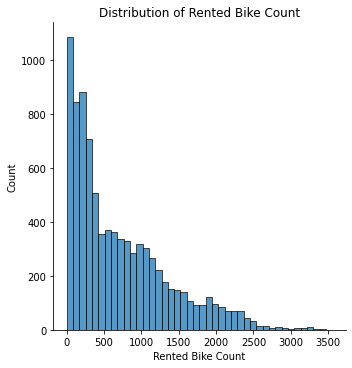

In [32]:
# Distribution of Dependent variable.
sns.displot(dataset['Rented Bike Count'])
plt.title('Distribution of Rented Bike Count')

From the above distribution plot, we can see that the distribution is right skewed. We can transform it to a normal distribution by using log transformation or square root transformation.

Text(0.5, 1.0, 'Distribution of Log Transformed Rented Bike Count')

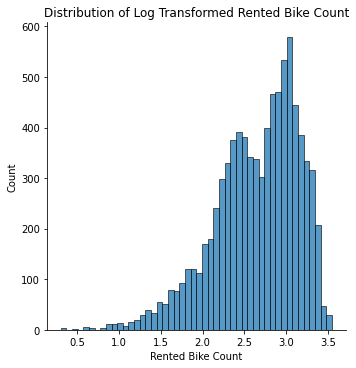

In [33]:
# Distribution after the log transformation.
log_transformation = np.log10(dataset['Rented Bike Count'])
sns.displot(log_transformation)
plt.title('Distribution of Log Transformed Rented Bike Count')

Text(0.5, 1.0, 'Square_root distribution of Rented Bike Count')

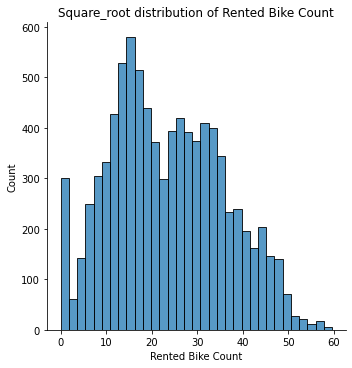

In [34]:
# Squared_root distribution of dependent variable.
square_root_transformations = np.sqrt(dataset['Rented Bike Count'])
sns.displot(square_root_transformations)
plt.title('Square_root distribution of Rented Bike Count')

From the above transformations, we can see that the square root transformation made the dependent variable more normal than the log transformation.

So i will be performing square root transformation on dependent variable while fitting a linear regression model.

### **Working on Independent Continuous Variables.**

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented Bike Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew point temperature  8760 non-null   float64 
 7   Solar Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   category
 9   Snowfall               8760 non-null   category
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning Day        8760 non-null   object  
 13  year                   8760 non-null   category
 14  month                  8760 non-null   c

In [36]:
# Creating a list of numeric variables.
conti_variables = dataset.describe(include = ['int64', 'float64']).columns
conti_variables = list(set(conti_variables) - {'Rented Bike Count'})
conti_variables

['Humidity',
 'Visibility',
 'Wind speed',
 'Solar Radiation',
 'Temperature',
 'Dew point temperature']

From the list of numeric variables, I have removed Rented Bike Count. Because Rented Bike count is dependent variable.

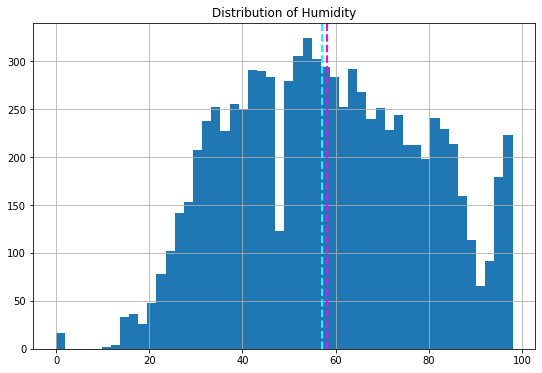

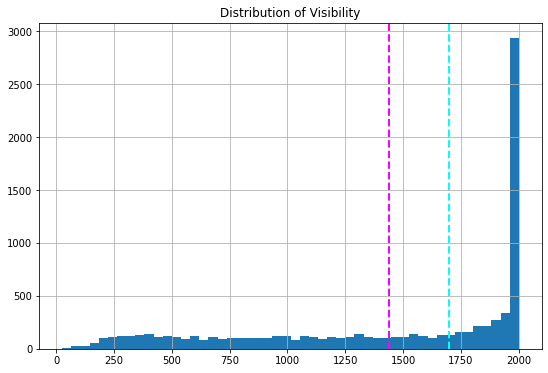

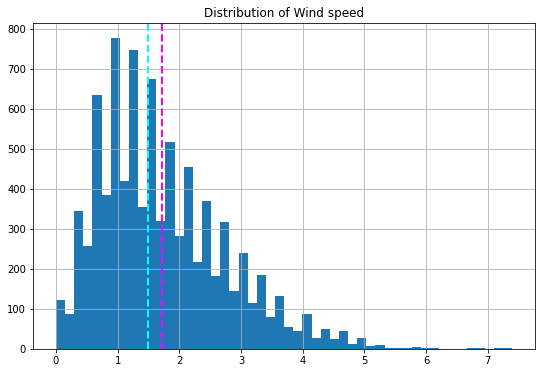

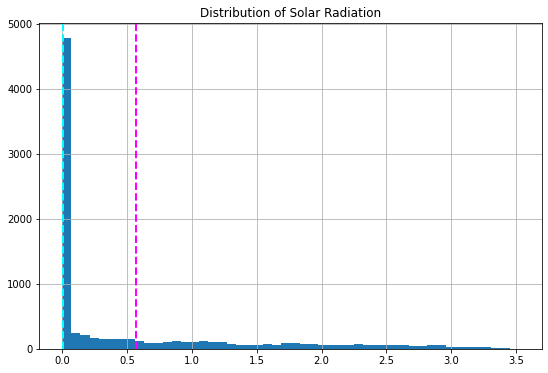

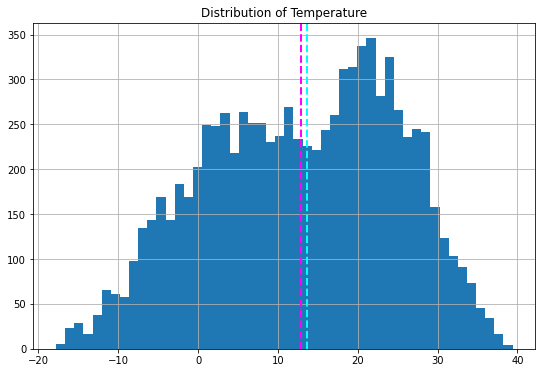

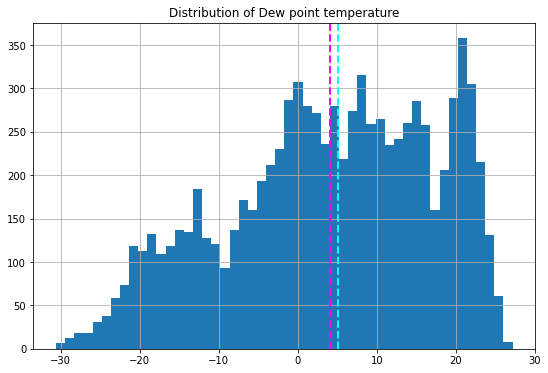

In [37]:
# Using a for loop to plot the distributions of all the numeric variables.
for col in conti_variables:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title('Distribution of '+ col)
plt.show()

The magenta line represents the mean of the distribution and the cyan line represents the median of the distribution.

There are a few columns whose distributions are skewed like Solar radiation, Visibility. I will be removing the outliers for all of these columns so that there distributions will approximate to a normal distribution.

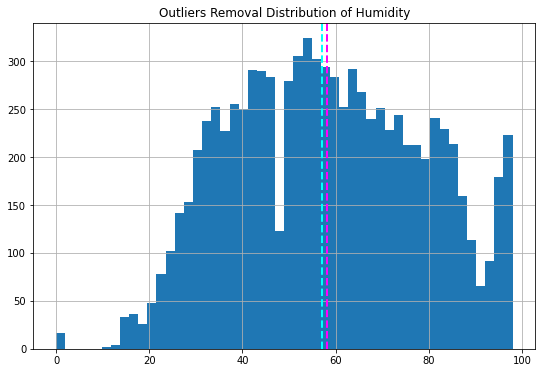

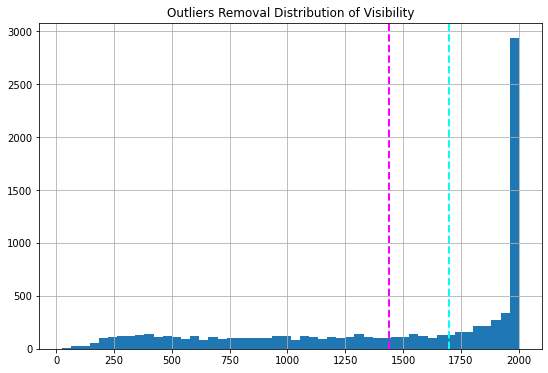

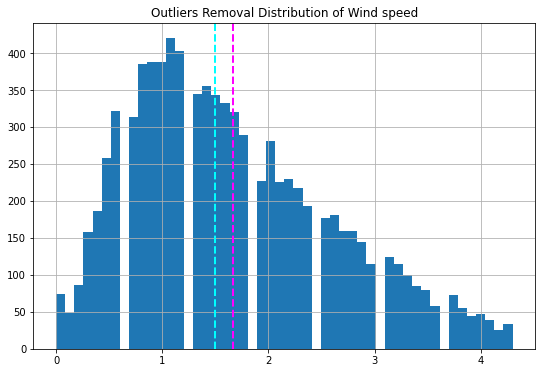

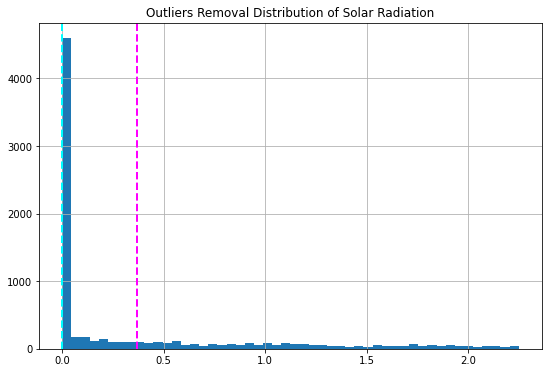

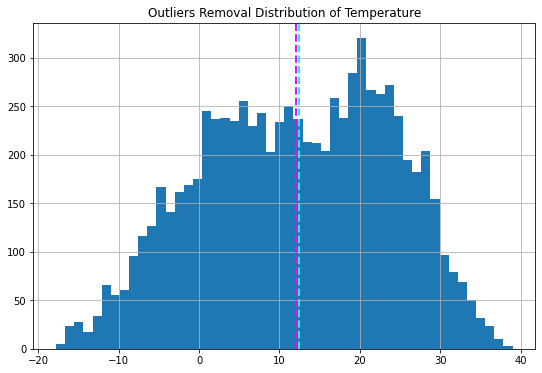

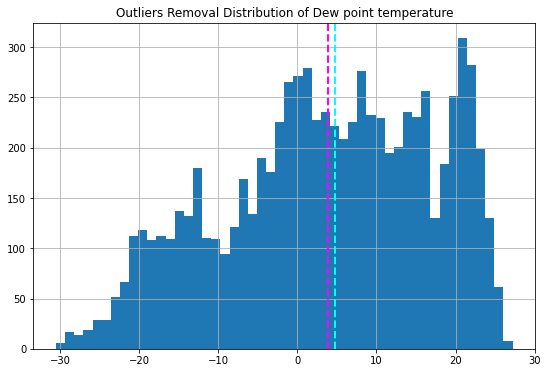

In [38]:
# Using for loop to remove the outliers which are represent in the dataset of every column.
for col in conti_variables:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  Q1 = np.percentile(dataset[col],25)
  Q3 = np.percentile(dataset[col],75)
  IQR = Q3 - Q1
  Lower_outliers = Q1 - 1.5*IQR
  Upper_outliers = Q3 + 1.5*IQR
  dataset = dataset[(dataset[col] >= Lower_outliers) & (dataset[col] <= Upper_outliers)]
  feature = dataset[col]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title('Outliers Removal Distribution of '+ col)
plt.show()

Form the above histogram plots we can see that the distributions of the numeric variables look more like a normal distribution after removing the outliers.

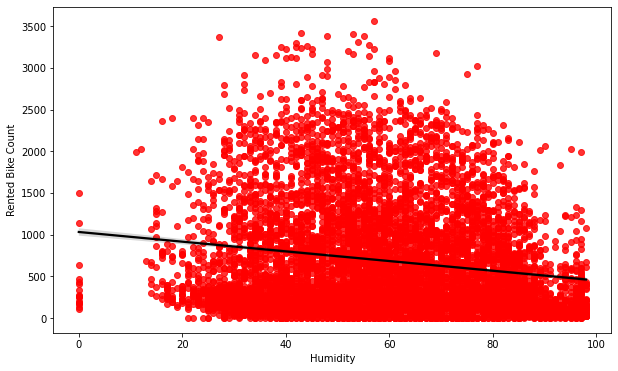

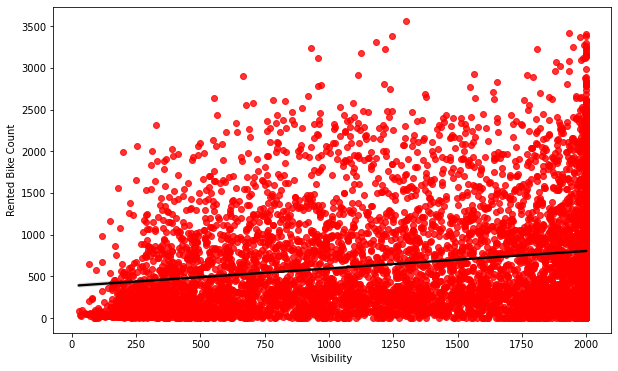

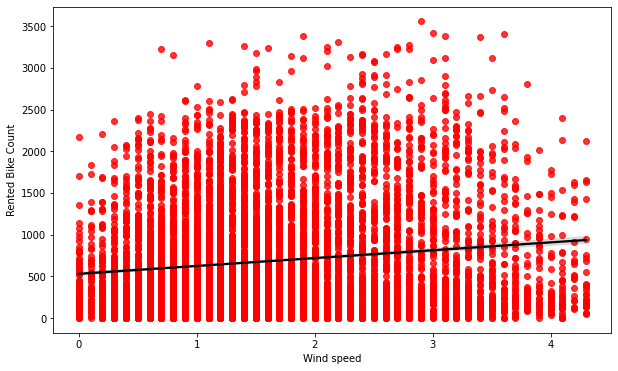

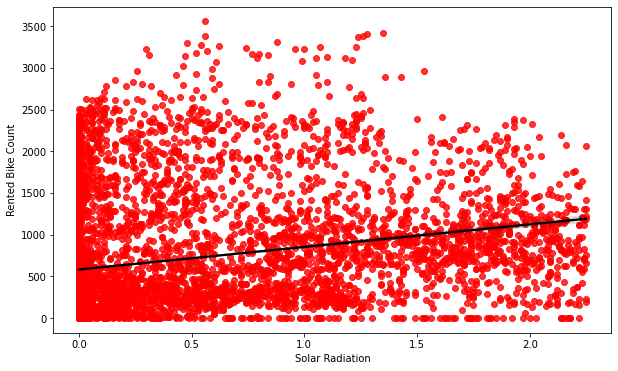

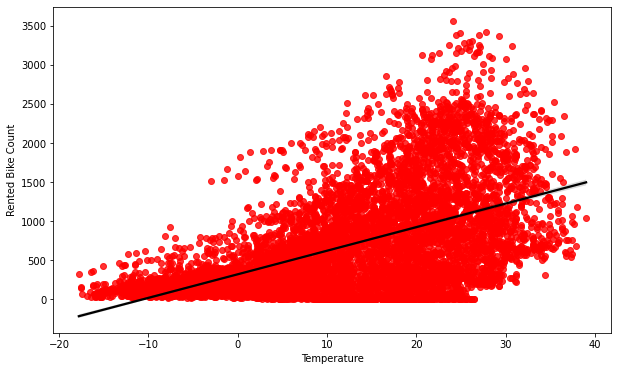

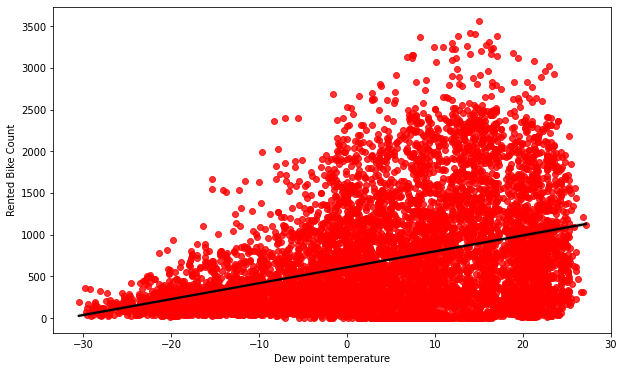

In [39]:
# Checking whether the relationship between the dependent and independent variables is linear.
for col in conti_variables:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=dataset[col],y=dataset['Rented Bike Count'],scatter_kws={"color": 'red'}, line_kws={"color": "black"})

 From the above scatter plots we can see that the relationships between dependent and independent variables is a linear one.

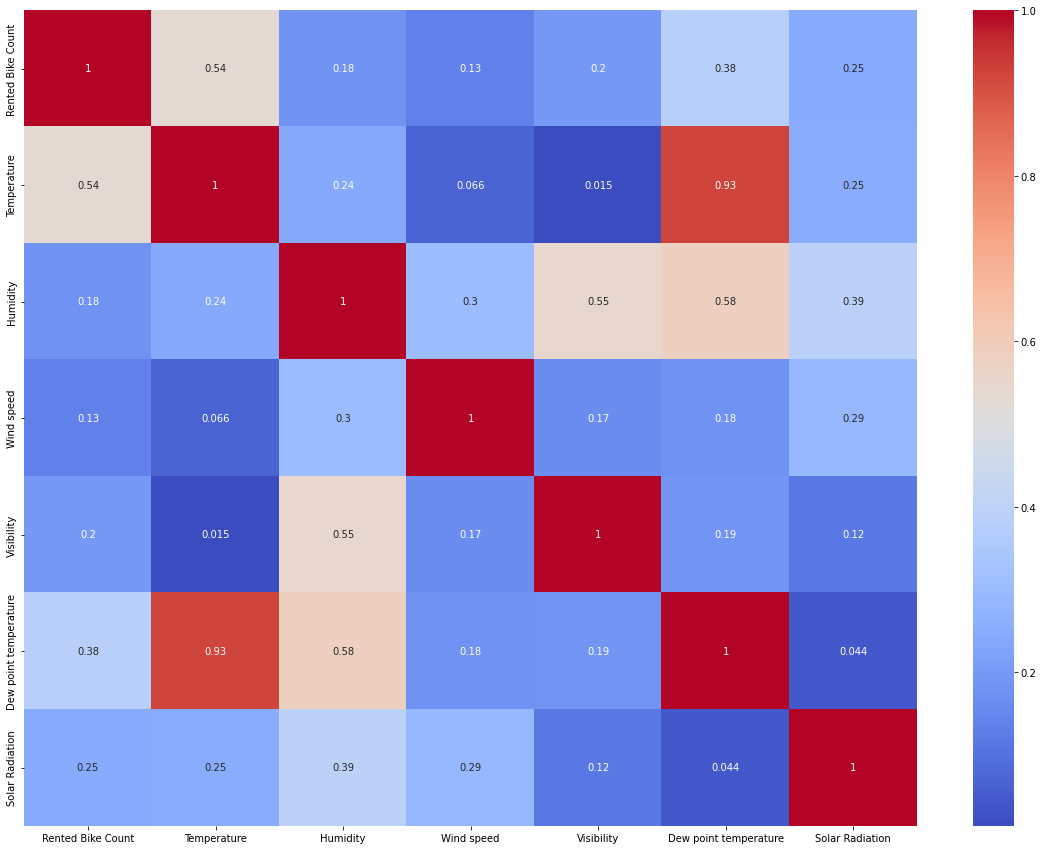

In [40]:
# Let us look at the correation table.
corr = dataset.corr()
plt.figure(figsize = (20,15))
sns.heatmap(abs(corr), cmap = 'coolwarm', annot = True)

The objective here is to find those columns that have a very low correlation with the dependent variable and dropping those columns so that we can reduce the complexity of the model that we are going to build.

The **Dew Point Temperature** and **Temperature** are highly correlated(0.93) to each other, we can drop column.

I will drop the **Dew Point Temperature** since it relatively less correlated to rented bike count than **Temperature**.

In [41]:
# Dropping Dew Point Temperature and Date columns.
dataset.drop(['Dew point temperature'], inplace = True, axis = 1)

In [42]:
#Removing Multicollinearlity using VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [43]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Temperature,2.607299
1,Humidity,4.331284
2,Wind speed,4.095804
3,Visibility,4.116021
4,Solar Radiation,1.819109


**Objective** - Our objective hear is to make sure that the VIF of all the columns above is below 5. If the VIF of all the columns are below 5, then we can safely assume that there is no multicollinearity between the independent variables.

There are no variables that have a VIF more than 5. But, if they had a VIF of more than 5 then the below specified approach has to be followed.

**Approach used to reduce the VIF**- We will check what other variable has a VIF value of the same range.

We will check both the variables corrrelation to confrim our finding that they indeed are correlated and remove the feature that has the lowest correlation with dependent variable(**Rented Bike Count**)

In [44]:
# My final Numerical Variable.
final_conti_var = list(set(dataset.describe().columns) - {'Rented Bike Count'})

In [45]:
final_conti_var

['Humidity', 'Visibility', 'Wind speed', 'Solar Radiation', 'Temperature']

###**Working on Categorical Variables.**

In [48]:
# Converting the discrete numeric variables into categorical variables.
dataset['Is_raining'] = np.where(dataset['Rainfall'] != 0.0,'Yes','No')
dataset['Is_snowing'] = np.where(dataset['Snowfall'] != 0.0, 'Yes','No')

Hour variable = I have converted all those values that are equal to 18(6Pm) as peak and the rest as non-peak. From the EDA(line chart) we go to know that at 18 the demand for bikes is really high.

Rainfall variable = If the value is not equal to 0.0, then I have converted into Yes(it is raining) else into No.

Snowfall variable = If the value is not equal to 0.0, then I have converted into Yes(it is snowing) else into No.

In [49]:
# Dropping Rainfall, Snowfall variables.
dataset.drop(['Rainfall','Snowfall'],axis = 1, inplace = True)

In [50]:
# Storing all the categorical variables in a variable.
categorical_variables = list(dataset.describe(include = ['object','category']).columns)

In [51]:
categorical_variables

['Hour',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'year',
 'month',
 'Is_Weekend',
 'Is_raining',
 'Is_snowing']

In [52]:
# Checking the changes that I have made up until now.
dataset.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Seasons,Holiday,Functioning Day,year,month,Is_Weekend,Is_raining,Is_snowing
0,254,0,-5.2,37,2.2,2000,0.0,Winter,No Holiday,Yes,2017,12,0,No,No
1,204,1,-5.5,38,0.8,2000,0.0,Winter,No Holiday,Yes,2017,12,0,No,No
2,173,2,-6.0,39,1.0,2000,0.0,Winter,No Holiday,Yes,2017,12,0,No,No
3,107,3,-6.2,40,0.9,2000,0.0,Winter,No Holiday,Yes,2017,12,0,No,No
4,78,4,-6.0,36,2.3,2000,0.0,Winter,No Holiday,Yes,2017,12,0,No,No


**Objective** - The objective is to encode the categorical variables so that the model can read the data in.

Categorical Variables are classified into 3 types:

* Dichotomous variables = These are those categorical variables which have only **2 classes** of categories. We can perfom binary encoding for these kind of variables.

* Ordinal Variables = These are those categorical variables which have **more than 2 classes** of categories and they signify **some order**. We can perform label encoding.

* Nominal Variables = These are those categorical variables which have **more than 2 classes** of categories and they do not signify **any order**. We can perform One hot encoding.

There are 3 dichotomous variables[**Holiday, Functioning day, year, Is_raining, Is_snowing**]. I will be performing binary encoding for these.

There is one nominal variable[**Seasons, Month**]. I will be performing one hot encoding.

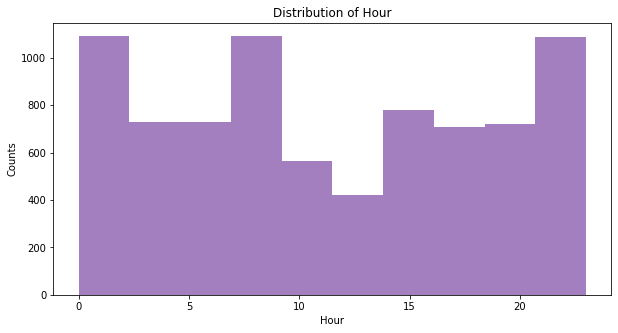

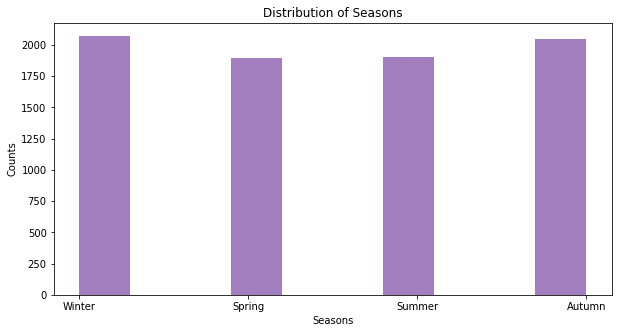

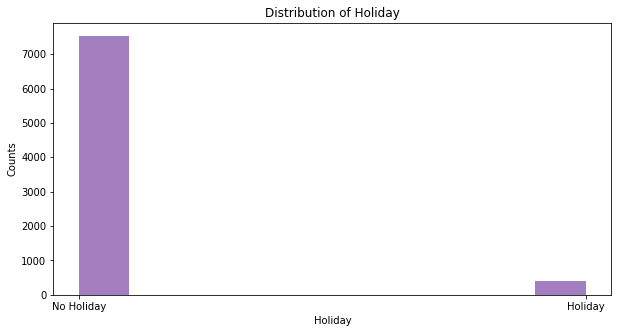

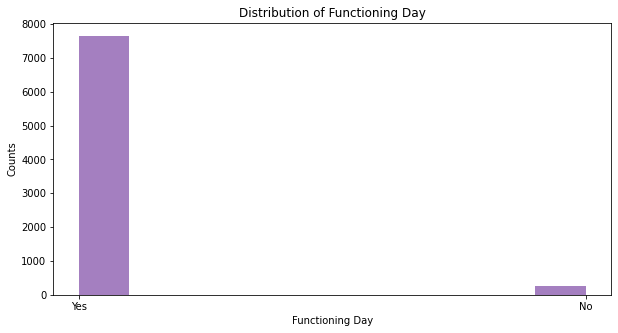

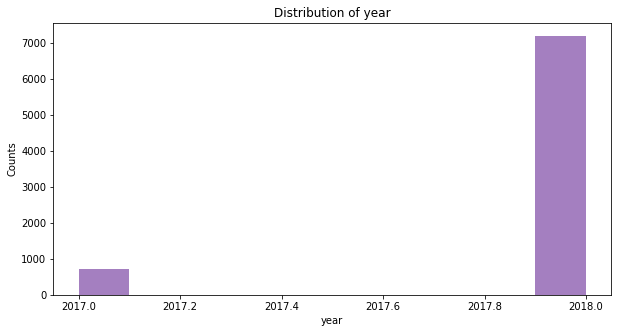

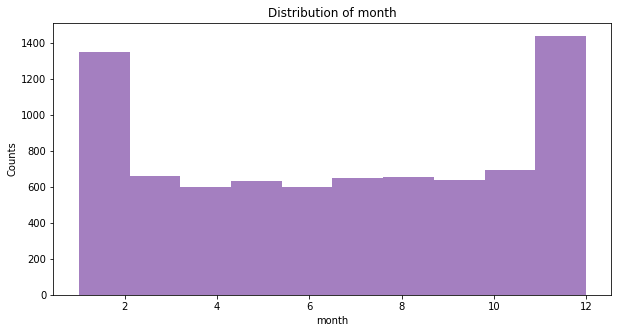

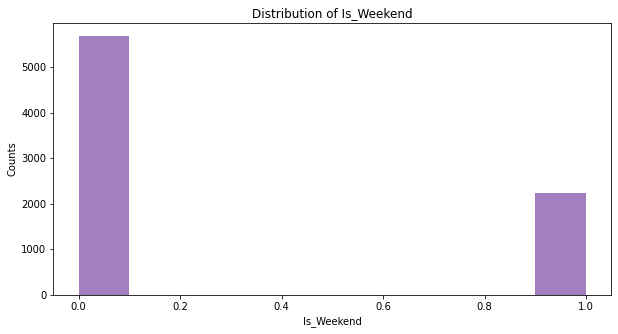

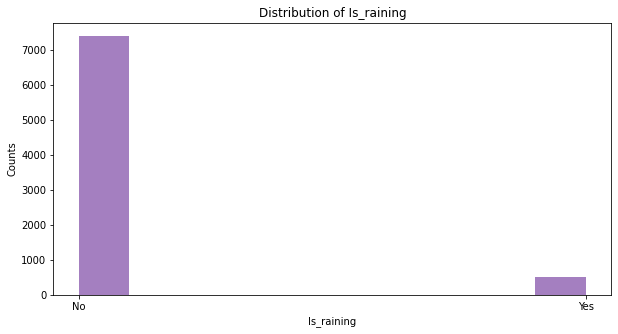

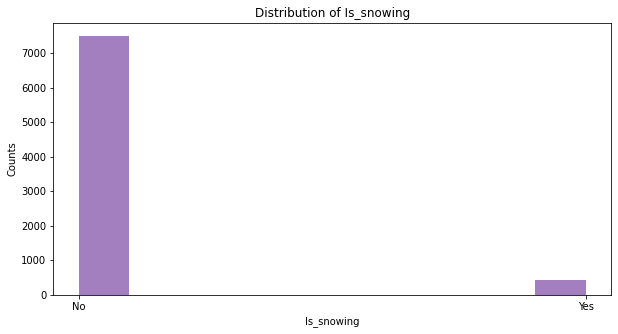

In [53]:
# Using the histograms to understand how the distribution of categorical variables.
for col in categorical_variables:

  fig = plt.figure(figsize = (10,5))
  ax = plt.gca()
  plt.hist(dataset[col], alpha = .5, color = 'indigo')
  plt.title('Distribution of ' + col)
  plt.xlabel(col)
  plt.ylabel('Counts')

Form the above distirbutions, we can conclude that apart from seasons all the other categorical variables are not equally distributed.

In [54]:
# Binary encoding.
binary_encoding = {'Holiday':{'No Holiday':0,'Holiday':1}, 'Functioning Day':{'Yes':1,'No':0}, 'year':{2018:1,2017:0},'Hour':{'Peak':1,'Non-peak':0},
                   'Is_raining':{'Yes':1,'No':0},'Is_snowing':{'Yes':1,'No':0}}
df = dataset.replace(binary_encoding)

In [55]:
# One hot encoding.
df = pd.get_dummies(df,columns = ['Seasons','month'],prefix = ['Season_','Month_'])

### **Train Test Split.**

The Train Test Split function is used to split the dataset in 4 parts[Independent train, independent test, dependent train, dependent test].  

In [56]:
# Preparing the data for train test split.
dependent_var = {'Rented Bike Count'}
independent_var = list(set(df.columns) - dependent_var)

In [57]:
independent_var

['Month__3',
 'Is_raining',
 'Month__7',
 'Month__10',
 'Month__1',
 'Wind speed',
 'Season__Summer',
 'Visibility',
 'Month__8',
 'Is_Weekend',
 'Season__Winter',
 'Month__2',
 'Month__12',
 'Functioning Day',
 'Humidity',
 'Month__9',
 'Is_snowing',
 'Season__Autumn',
 'Hour',
 'Season__Spring',
 'Month__6',
 'Solar Radiation',
 'year',
 'Holiday',
 'Temperature',
 'Month__11',
 'Month__5',
 'Month__4']

In [58]:
# Storing the data into X and y variables.
X = df[independent_var].values
y = np.sqrt(df[dependent_var].values)

In [59]:
# Performing train_test_split.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 9999)

I have used random sampling and not used stratified sampling to split the dataframe because it doesn't have sense to use stratify sampling when your dependent variable is continous.

### **Rescaling the independent variables as all the variables are on a different scales.**

In [60]:
# Scaling the variables using MinMaxScaler.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

I have used MinMaxScaler to rescale the data. MinMaxScaler formula = (X - X_min) / (X_max - X_min). All the values will be between 0 and 1.

### **Linear Regression Implementation.**

In [61]:
# Fitting a best line to our model.
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [62]:
# Checking out the intercept and coefficients of the model.
regressor.intercept_

array([-4.83897426e+13])

The intercept tells us the average value of Y, when all the X variables are assumed constant.

In [63]:
regressor.coef_

array([[ 6.85343632e+13, -1.29609375e+01,  1.26982961e+14,
         2.51528090e+14,  1.05783915e+14,  2.29073351e+00,
        -1.33099768e+13,  1.58179317e+00,  1.26982961e+14,
        -1.93042594e+00,  7.88906872e+12,  1.05783915e+14,
         4.05006739e+13,  2.90906067e+01, -1.01502935e+01,
         2.51528090e+14,  5.37100992e-01, -1.37855107e+14,
         1.11156311e+01,  4.51386207e+13,  1.26982961e+14,
        -7.16735840e-01, -6.52832412e+13, -3.32641602e+00,
         3.12373047e+01,  2.51528090e+14,  6.85343632e+13,
         6.85343632e+13]])

In [64]:
independent_var

['Month__3',
 'Is_raining',
 'Month__7',
 'Month__10',
 'Month__1',
 'Wind speed',
 'Season__Summer',
 'Visibility',
 'Month__8',
 'Is_Weekend',
 'Season__Winter',
 'Month__2',
 'Month__12',
 'Functioning Day',
 'Humidity',
 'Month__9',
 'Is_snowing',
 'Season__Autumn',
 'Hour',
 'Season__Spring',
 'Month__6',
 'Solar Radiation',
 'year',
 'Holiday',
 'Temperature',
 'Month__11',
 'Month__5',
 'Month__4']

From looking at the coefficients, we can conclude that variable **Season_winter** has relatively a lot of influence on the prediction.

In [65]:
# Predicting the values of X_test from the above intercept and coef_.
y_predict_train = regressor.predict(X_train)
y_predict_test = regressor.predict(X_test)

#### *Heteroscadacity/ Homoscadacity.*

Text(0, 0.5, 'Residuals')

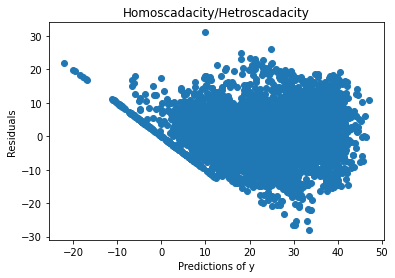

In [66]:
# Checking for Heteroscadacity/ Homoscadacity.
residuals = y_train - y_predict_train
y_predicted = y_predict_train
plt.scatter(x = y_predicted, y = residuals)
plt.title('Homoscadacity/Hetroscadacity')
plt.xlabel('Predictions of y')
plt.ylabel('Residuals')

From the above plot, we can conclude that there is **homoscadacity**, as there isn't conspicuous pattern in the plot.

####*Checking the mean of the residuals and their distribution.*

Text(0.5, 1.0, 'Distribution of residuals')

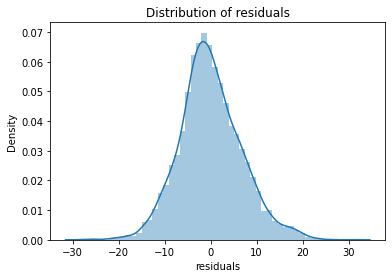

In [67]:
# Checking if the residuals form a normal distribution.
sns.distplot(residuals)
plt.xlabel('residuals')
plt.title('Distribution of residuals')

We can see that the distribution is normally distributed.

In [68]:
# Mean of the residuals.
np.mean(residuals)

-0.0007241003640628415

The mean of the residuals is close to zero. So we can conclude that this is the best fit line.

#### *Linear Regression Metrics.*

* The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast. The lower the value the better the model.

* MSE formula = (1/n) * Σ(actual – forecast)2
Where:

*   n = number of items,
* Σ = summation notation,
* Actual = original or observed y-value,
* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). The lower the value the better the model.

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.The lower the value the better the model.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. The higher the score the better the model is.

* Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned} 
​
  
* R 
2
 =1− 
Total Variation
Unexplained Variation
​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The higher the score the better the model is.
​


In [69]:
# Printing all the metrics of training data.
r2_train = r2_score(y_train**2,y_predict_train**2)
print('R2 score:' ,r2_train)

adjusted_r2_train = (1-(1-r2_score(y_train**2, y_predict_train**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2 score: ', adjusted_r2_train)

mse_train = mean_squared_error(y_train**2,y_predict_train**2)
print('MSE: ',mse_train)

mae_train = mean_absolute_error(y_train**2,y_predict_train**2)
print('MAE: ',mae_train)

R2 score: 0.6640362606247907
Adjusted R2 score:  0.6579867527775201
MSE:  143793.23722296263
MAE:  255.18004457445747


In [70]:
# Printing all the metrics of testing data.
r2_test = r2_score(y_test**2,y_predict_test**2)
print('R2 score: ',r2_test)

adjusted_r2_test = (1-(1-r2_score((y_test**2), (y_predict_test**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 score: ', adjusted_r2_test)

mse_test = mean_squared_error(y_test**2,y_predict_test**2)
print('MSE: ',mse_test)

mae_test = mean_absolute_error(y_test**2,y_predict_test**2)
print('MAE: ',mae_test)

R2 score:  0.6826141538026766
Adjusted R2 score:  0.6768991675045899
MSE:  143520.37702630804
MAE:  254.55758408825807


If we compare the performance metrics of linear regression on both traning and testing data, we can see that our model performs a tad better on the testing data than training. This suggests that the model is not overfit. 

Later on, we will use regularised linear regression to see if we can imporve the model testing performance.

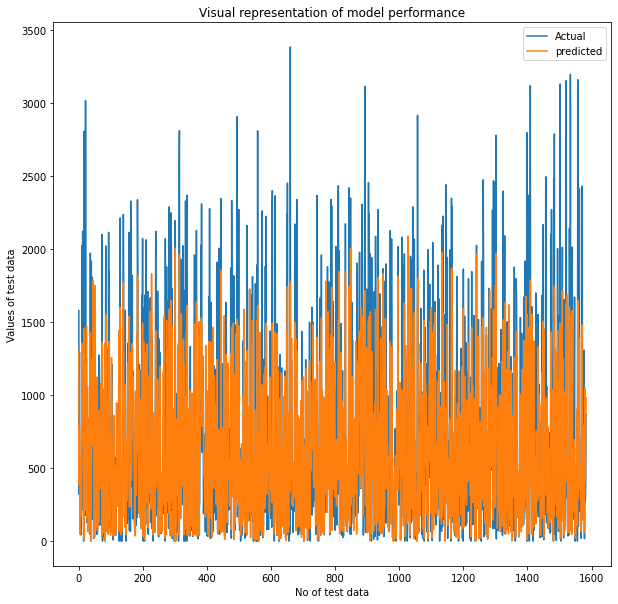

In [71]:
# Visual representation of model performance.
plt.figure(figsize = (10,10))
plt.plot(y_test**2)
plt.plot(y_predict_test**2)
plt.title('Visual representation of model performance')
plt.xlabel('No of test data')
plt.ylabel('Values of test data')
plt.legend(['Actual','predicted'])

#### *Finding out the average performance of the model(CV)*

In [72]:
# Creating my own cross validation function because of the below reason.
def cross_val_lr(X,y):
  
  random_state = [5,10,15,20,25,30,35,40,45,50]  
  
  R2 = []
  
  for seed in random_state:
    
    X_train_cv,X_test_cv,y_train_cv,y_test_cv = train_test_split(X,y,test_size = .20,random_state = seed) # Splitting the data at various seeds.
    
    regressorcv = LinearRegression()    # instantiating Linear Regression.
    
    regressorcv.fit(X_train_cv,y_train_cv)  # Fitting a linear regression model.
    
    y_predict_test_cv = regressorcv.predict(X_test_cv)    # Predicting the test values
    
    r2 = r2_score(y_test_cv**2,y_predict_test_cv**2)  # Calculating the test performance of the model
    
    R2.append(R2)   # Appendending the R2 score to a list named R2.
  
  return np.mean(R2)  # Returning the mean of the R2_scores.

There is a problem with the inbuilt cross_validation function. I have done a square root transformation on the dependent variable so before calculating the performace metric i need to square the dependent variable. But the inbuilt cross validation function doesn't allow me to do that.

The function that I have created is taking a lot of time to run and as a consequence of that is my google colab is getting crashed.

So to evade from my google colab getting crashed I will be using the built in cross validate function.

In [73]:
# Cross validation.
cv_model = cross_validate(regressor, X_train,y_train,scoring = 'r2', cv = 10, return_train_score = True)

In [74]:
cv_model

{'fit_time': array([0.01268387, 0.02307582, 0.02216554, 0.03013539, 0.01481771,
        0.0142889 , 0.01863146, 0.01136327, 0.0083003 , 0.0088675 ]),
 'score_time': array([0.0053637 , 0.00159788, 0.00352859, 0.00158048, 0.00397539,
        0.00103879, 0.00258827, 0.00101113, 0.00123858, 0.00099874]),
 'test_score': array([0.68161299, 0.69988292, 0.68318729, 0.6928447 , 0.66843798,
        0.7241358 , 0.69409614, 0.73550624, 0.73735505, 0.74030684]),
 'train_score': array([0.71202819, 0.70963105, 0.71111801, 0.71034824, 0.71296551,
        0.70727624, 0.71048582, 0.70594655, 0.70538534, 0.70504315])}

In [75]:
# Average accuracy of the model.
avg_per = np.mean(cv_model['test_score'])
print('The average performance of the model is',avg_per)

The average performance of the model is 0.7057365949476642


## **Regularized Linear Regression.**


Regularized Linear Regression is implemented when the model is overfitting. It reduces the complexity of the model by penalising the coefficients. There are 3 regularised linear regressions:

* Lasso 

* Ridge

* Elastic Net

I will be implementing all of them to see if my model performance improves.
Personally, I don't think my model performance improves because my model is not overfitting.

**Note-** I will be only evaluting the R2 scores of various models for comparision rather than all the metrics because all tell the story.

### *Lasso Implementation.*

In [76]:
# Implementing Lasso Regression
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train) #Fitting lasso to the model.

Lasso(alpha=0.1)

In [77]:
independent_var

['Month__3',
 'Is_raining',
 'Month__7',
 'Month__10',
 'Month__1',
 'Wind speed',
 'Season__Summer',
 'Visibility',
 'Month__8',
 'Is_Weekend',
 'Season__Winter',
 'Month__2',
 'Month__12',
 'Functioning Day',
 'Humidity',
 'Month__9',
 'Is_snowing',
 'Season__Autumn',
 'Hour',
 'Season__Spring',
 'Month__6',
 'Solar Radiation',
 'year',
 'Holiday',
 'Temperature',
 'Month__11',
 'Month__5',
 'Month__4']

In [78]:
print(lasso.coef_)
print('\n')
print(lasso.intercept_)

[ -1.58069962 -11.70303987   0.           0.8006906   -0.
   0.           0.           0.9008968   -0.57039648  -1.31877889
  -5.89471986  -0.14085922   0.          25.20607502  -8.11396229
   0.          -0.           1.60361135  11.61917661  -0.
   4.0771181    0.23316948  -0.          -0.64263489  21.13146121
  -0.           1.22258713  -0.        ]


[-11.95151187]


In [79]:
# Predicting the Training values to analyse the performance of the training.
y_train_predict_lasso = lasso.predict(X_train)

#### *Heteroscadacity/ Homoscadacity.*

Text(0, 0.5, 'Residuals')

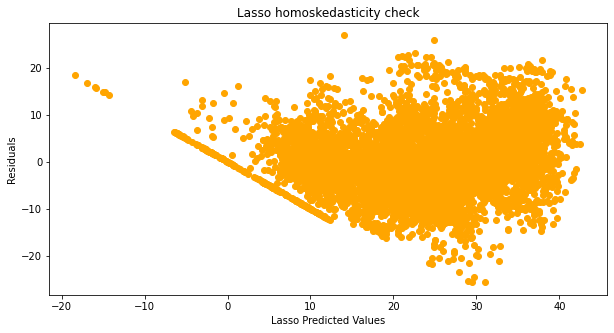

In [80]:
# Let us check if the assumptions of homoskedasticity and the residual mean ~= 0 are valid.
# homoskedasticity check.
residuals_lasso = y_train.flatten() - y_train_predict_lasso
y_predicted_lasso = y_train_predict_lasso
plt.figure(figsize = (10,5))
plt.scatter(x = y_predicted_lasso, y = residuals_lasso, color = 'orange')
plt.title('Lasso homoskedasticity check')
plt.xlabel('Lasso Predicted Values')
plt.ylabel('Residuals')

**Note** - I have flattened the y_train because it was a 2d array whereas y_train_predict_lasso was 1d.

By looking at the scatter plot we can infer that the homoskedasticity assumption is true as there isn't they clear pattern that is being shown by the plot.

####*Checking the mean of the residuals and their distribution.*

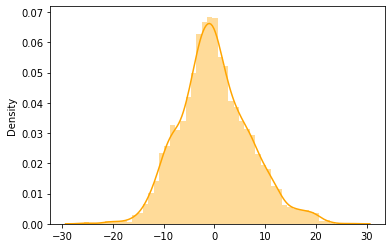

In [81]:
# Checking if the residuals are normally distributed.
sns.distplot(residuals_lasso, color = 'orange')

The residuals are indeed orange in color.

In [82]:
# Checking if the mean of the residuals is zero or close to zero.
np.mean(residuals_lasso)

6.866448038610158e-16

The mean of the residuals is indeed close to zero.

In [83]:
# We will predict the test values.
y_test_predict_lasso = lasso.predict(X_test)

####*Performance Metrics.*

In [84]:
# Printing all the metrics of lasso training data.
r2_train_lasso = r2_score(y_train**2,y_train_predict_lasso**2)
print('R2 score:' ,r2_train_lasso)

adjusted_r2_train_lasso = (1-(1-r2_score(y_train**2, y_train_predict_lasso**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2 score: ', adjusted_r2_train_lasso)

mse_train_lasso = mean_squared_error(y_train**2,y_train_predict_lasso**2)
print('MSE: ',mse_train_lasso)

mae_train_lasso = mean_absolute_error(y_train**2,y_train_predict_lasso**2)
print('MAE: ',mae_train_lasso)

R2 score: 0.6231741200738625
Adjusted R2 score:  0.6163888309176363
MSE:  161282.3254221971
MAE:  267.14838566673615


In [85]:
# Printing all the metrics of lasso testing data.
r2_test_lasso = r2_score(y_test**2,y_test_predict_lasso**2)
print('R2 score: ',r2_test_lasso)

adjusted_r2_test_lasso = (1-(1-r2_score((y_test**2), (y_test_predict_lasso**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 score: ', adjusted_r2_test_lasso)

mse_test_lasso = mean_squared_error(y_test**2,y_test_predict_lasso**2)
print('MSE: ',mse_test_lasso)

mae_test_lasso = mean_absolute_error(y_test**2,y_test_predict_lasso**2)
print('MAE: ',mae_test_lasso)

R2 score:  0.6377086194025119
Adjusted R2 score:  0.6311850447036504
MSE:  163826.44708235154
MAE:  269.46054148668816


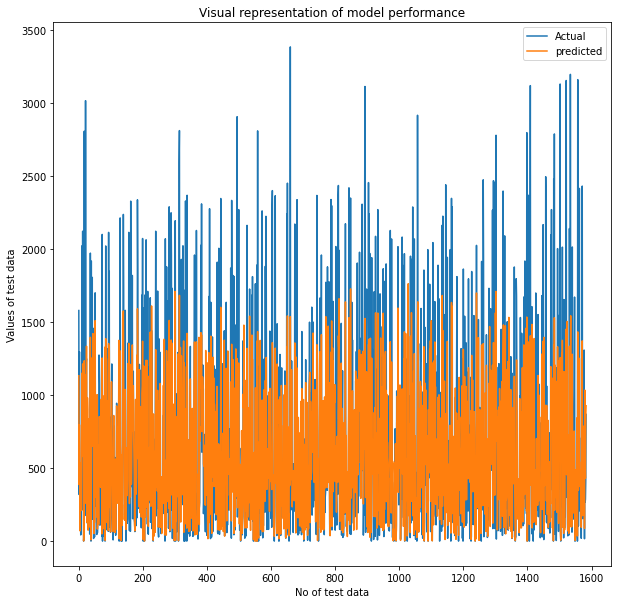

In [86]:
# Visual representation of model performance.
plt.figure(figsize = (10,10))
plt.plot(y_test**2)
plt.plot(y_test_predict_lasso**2)
plt.title('Visual representation of model performance')
plt.xlabel('No of test data')
plt.ylabel('Values of test data')
plt.legend(['Actual','predicted'])

### *Ridge Implementation.*

In [87]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)  # Fitting a ridge model.

Ridge(alpha=0.1)

In [88]:
independent_var

['Month__3',
 'Is_raining',
 'Month__7',
 'Month__10',
 'Month__1',
 'Wind speed',
 'Season__Summer',
 'Visibility',
 'Month__8',
 'Is_Weekend',
 'Season__Winter',
 'Month__2',
 'Month__12',
 'Functioning Day',
 'Humidity',
 'Month__9',
 'Is_snowing',
 'Season__Autumn',
 'Hour',
 'Season__Spring',
 'Month__6',
 'Solar Radiation',
 'year',
 'Holiday',
 'Temperature',
 'Month__11',
 'Month__5',
 'Month__4']

In [89]:
# Ridge regression coef and intercept
print(ridge.coef_)
print('\n')
print(ridge.intercept_)

[[ -1.78714603 -12.83576884  -1.19930638   2.23286433  -1.15586528
    2.05176286  -0.12972824   1.63883633  -3.64113089  -1.91453396
   -2.68401852  -1.90268459   0.37453136  29.12840311 -10.18391331
   -0.87074587   0.56921512   2.35955353  11.14126653   0.45419323
    4.71070902  -0.82605815  -0.37453136  -3.31119455  31.16919677
    0.99743507   2.35113317  -0.10979391]]


[-20.72162989]


In [90]:
# Predicted the Y_train values from X_train.
y_train_predict_ridge = ridge.predict(X_train)

#### *Heteroscadacity/ Homoscadacity.*




Text(0, 0.5, 'Residuals')

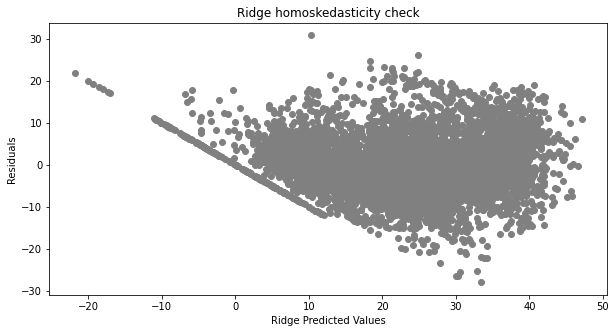

In [91]:
# Let us check if the assumptions of homoskedasticity and the residual mean ~= 0 are valid.
# homoskedasticity check.
residuals_ridge = y_train - y_train_predict_ridge
y_predicted_ridge = y_train_predict_ridge
plt.figure(figsize = (10,5))
plt.scatter(x = y_predicted_ridge, y = residuals_ridge, color = 'grey')
plt.title('Ridge homoskedasticity check')
plt.xlabel('Ridge Predicted Values')
plt.ylabel('Residuals')

By looking at the scatter plot we can infer that the homoskedasticity assumption is true as there isn't they clear pattern that is being shown by the plot.

####*Checking the mean of the residuals and their distribution.*

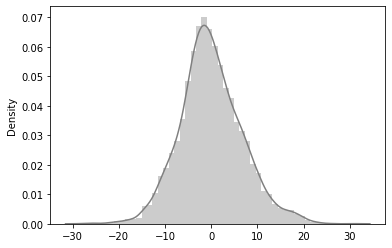

In [92]:
# Checking the distribution of residuals.
sns.distplot(residuals_ridge, color = 'grey')

The residuals are normally distributed as you can see.

In [93]:
# Checking if the mean of the residuals is zero or close to zero.
np.mean(residuals_ridge)

5.792724056102001e-14

The mean of the residual is close to zero.

In [94]:
# We will predict the test values.
y_test_predict_ridge = ridge.predict(X_test)

####*Performance Metrics.*

In [95]:
# Printing all the metrics of ridge training data.
r2_train_ridge = r2_score(y_train**2,y_train_predict_ridge**2)
print('R2 score:' ,r2_train_ridge)

adjusted_r2_train_ridge = (1-(1-r2_score(y_train**2, y_train_predict_ridge**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2 score: ', adjusted_r2_train_ridge)

mse_train_ridge = mean_squared_error(y_train**2,y_train_predict_ridge**2)
print('MSE: ',mse_train_ridge)

mae_train_ridge = mean_absolute_error(y_train**2,y_train_predict_ridge**2)
print('MAE: ',mae_train_ridge)

R2 score: 0.6648777266545306
Adjusted R2 score:  0.6588433706071524
MSE:  143433.08786680154
MAE:  254.77265894433134


In [96]:
# Printing all the metrics of lasso testing data.
r2_test_ridge = r2_score(y_test**2,y_test_predict_ridge**2)
print('R2 score: ',r2_test_ridge)

adjusted_r2_test_ridge = (1-(1-r2_score((y_test**2), (y_test_predict_ridge**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 score: ', adjusted_r2_test_ridge)

mse_test_ridge = mean_squared_error(y_test**2,y_test_predict_ridge**2)
print('MSE: ',mse_test_ridge)

mae_test_ridge = mean_absolute_error(y_test**2,y_test_predict_ridge**2)
print('MAE: ',mae_test_ridge)

R2 score:  0.6832916729776131
Adjusted R2 score:  0.6775888863817117
MSE:  143214.00606303275
MAE:  254.1423129173502


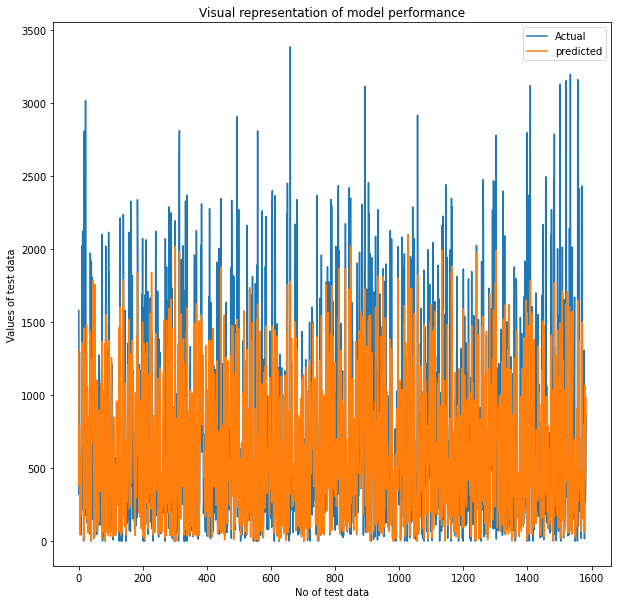

In [97]:
# Visual representation of model performance.
plt.figure(figsize = (10,10))
plt.plot(y_test**2)
plt.plot(y_test_predict_ridge**2)
plt.title('Visual representation of model performance')
plt.xlabel('No of test data')
plt.ylabel('Values of test data')
plt.legend(['Actual','predicted'])

###*ElasticNet Implementation*.

In [98]:
# instantiating ElasticNet
elasticnet = ElasticNet(alpha = 0.5, l1_ratio = 0.3)

I have taken l1_ratio as 0.3 because I want to penalize my model more through ridge than lasso because a higher lasso penalty might make some features coef's to zero.

In [99]:
# Fitting a Elastic Net model to the model.
elasticnet.fit(X_train,y_train)
print(elasticnet.coef_)
print('\n')
print(elasticnet.intercept_)

[-0.15421308 -1.57171117  0.34409765  0.11097956 -0.91878673  0.34014477
  2.16295049  1.16582609  0.         -0.25246832 -3.07020293 -0.79279378
 -0.50146872  1.72876187 -0.93726243  0.00782229 -0.44517664  0.40818947
  2.9559812   0.          0.96999327  1.27326996  0.5014669  -0.05563879
  1.97271384 -0.          0.33027676 -0.        ]


[18.12931446]


In [100]:
# Predicted the Y_train values from X_train.
y_train_predict_elasticnet = elasticnet.predict(X_train)

#### *Heteroscadacity/ Homoscadacity.*




Text(0, 0.5, 'Residuals')

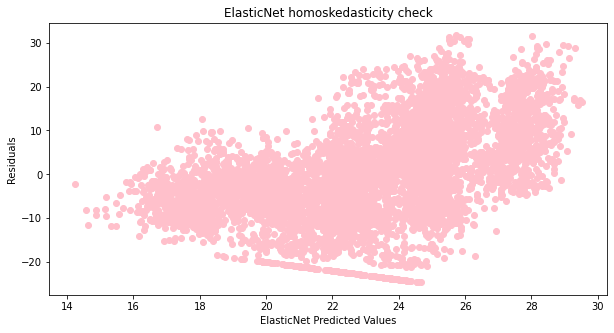

In [101]:
# Let us check if the assumptions of homoskedasticity and the residual mean ~= 0 are valid.
# homoskedasticity check.
residuals_elasticnet = y_train.flatten() - y_train_predict_elasticnet
y_predicted_elasticnet = y_train_predict_elasticnet
plt.figure(figsize = (10,5))
plt.scatter(x = y_predicted_elasticnet, y = residuals_elasticnet, color = 'pink')
plt.title('ElasticNet homoskedasticity check')
plt.xlabel('ElasticNet Predicted Values')
plt.ylabel('Residuals')

By looking at the scatter plot we can infer that the homoskedasticity assumption is true as there isn't they clear pattern that is being shown by the plot.

####*Checking the mean of the residuals and their distribution.*

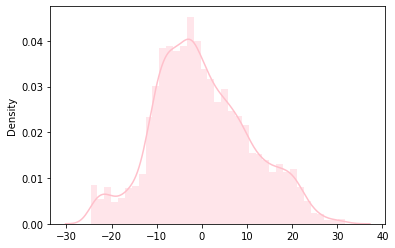

In [102]:
# Checking the distribution of residuals.
sns.distplot(residuals_elasticnet, color = 'pink')

The residuals are close to normal distribution.

In [103]:
# Checking if the mean of the residuals is zero or close to zero.
np.mean(residuals_elasticnet)

4.487874535039319e-17

The mean of the residual is close to zero.

In [104]:
# We will predict the test values.
y_test_predict_elasticnet = elasticnet.predict(X_test)

####*Performance Metrics.*

In [105]:
# Printing all the metrics of elasticnet training data.
r2_train_elasticnet = r2_score(y_train**2,y_train_predict_elasticnet**2)
print('R2 score:' ,r2_train_elasticnet)

adjusted_r2_train_elasticnet = (1-(1-r2_score(y_train**2, y_train_predict_elasticnet**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted R2 score: ', adjusted_r2_train_elasticnet)

mse_train_elasticnet = mean_squared_error(y_train**2,y_train_predict_elasticnet**2)
print('MSE: ',mse_train_elasticnet)

mae_train_elasticnet = mean_absolute_error(y_train**2,y_train_predict_elasticnet**2)
print('MAE: ',mae_train_elasticnet)

R2 score: 0.19847608020111895
Adjusted R2 score:  0.18404349515007812
MSE:  343054.04313529894
MAE:  410.1631543781018


In [106]:
# Printing all the metrics of elasticnet testing data.
r2_test_elasticnet = r2_score(y_test**2,y_test_predict_elasticnet**2)
print('R2 score: ',r2_test_elasticnet)

adjusted_r2_test_elasticnet = (1-(1-r2_score((y_test**2), (y_test_predict_elasticnet**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 score: ', adjusted_r2_test_elasticnet)

mse_test_elasticnet = mean_squared_error(y_test**2,y_test_predict_elasticnet**2)
print('MSE: ',mse_test_elasticnet)

mae_test_elasticnet = mean_absolute_error(y_test**2,y_test_predict_elasticnet**2)
print('MAE: ',mae_test_elasticnet)

R2 score:  0.19753785024906767
Adjusted R2 score:  0.18308837102525677
MSE:  362869.5849593521
MAE:  423.7560526386829


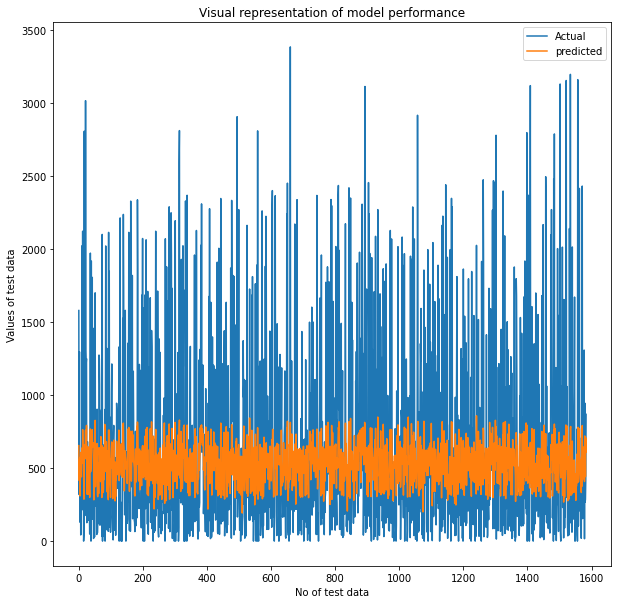

In [107]:
# Visual representation of model performance.
plt.figure(figsize = (10,10))
plt.plot(y_test**2)
plt.plot(y_test_predict_elasticnet**2)
plt.title('Visual representation of model performance')
plt.xlabel('No of test data')
plt.ylabel('Values of test data')
plt.legend(['Actual','predicted'])

### *Comparing the performance of variables models.*

In [108]:
# Creating a dataframe to compare the performance of the models.
arbitrary_models_performance = pd.DataFrame({'Model':['Linear Regression', 'Lasso Regression','Ridge Regression','ElasticNet Regression'],
              'R2 Scores':[r2_test,r2_test_lasso,r2_test_ridge,r2_test_elasticnet]})

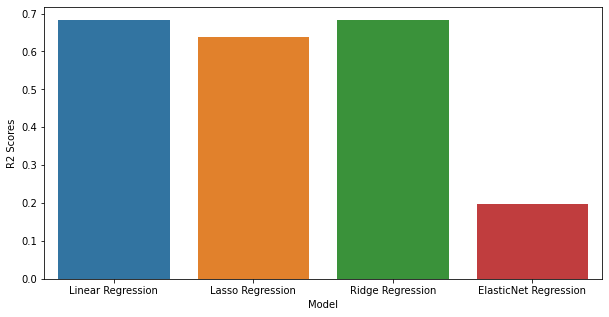

In [109]:
# Visualising the performance of the models.
plt.figure(figsize = (10,5))
sns.barplot(x = arbitrary_models_performance['Model'], y = arbitrary_models_performance['R2 Scores'], data = arbitrary_models_performance)

From the above bar chart, we can see that the Linear regression has a tiny edge over all the other regression models when the hyperparameters of lasso, ridge, elasticnet are set arbitrarily.

ElasticNet Regression is the worst performing regression model.

##**Hyperparameter Tuning.**

Meaning of Hyperparameters:

Hyperparameters are those parameters that are used to control the performance of a model.

Hyperparameter tuning is the process of figuring out the best hyperparameters for the model. 

Hyperparameter tuning can be done in one of 3 following ways.

* Grid Search - It calculates the scoring for all the possible combinations of hyperparameters and returns that combination of hyperparameters that has the highest scoring.

* Random Search - It calculates the scoring for random combinations of hyperparameters and return that combination that has the highest scoring.

* Bayesian Optimization - Bayesian Optimization is an approach that uses Bayes Theorem to direct the search for hyperparameters in order to find the hyperparameters that return the maximum scoring.

I will be using Grid search to tune my hyperparameters because implementing regularised linear regression at all possible combinations of hyperparameters is not computational intensive becasue regularised linear regression is a simple model.

### *Hyperparameter Tuning for Lasso Regression.*

In [110]:
# Implementing Hyperparameter tuning for lasso regression.
grid_lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
gridsearch_lasso = GridSearchCV(grid_lasso,parameters,scoring = 'r2',cv = 10,verbose = 5) # instantiating gridsearch.
gridsearch_lasso.fit(X_train,y_train)   # Fitting the best parameters to the model.

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END ......................alpha=1e-15;, score=0.681 total time=   0.3s
[CV 2/10] END ......................alpha=1e-15;, score=0.701 total time=   0.3s
[CV 3/10] END ......................alpha=1e-15;, score=0.683 total time=   0.3s
[CV 4/10] END ......................alpha=1e-15;, score=0.692 total time=   0.2s
[CV 5/10] END ......................alpha=1e-15;, score=0.669 total time=   0.3s
[CV 6/10] END ......................alpha=1e-15;, score=0.725 total time=   0.2s
[CV 7/10] END ......................alpha=1e-15;, score=0.694 total time=   0.2s
[CV 8/10] END ......................alpha=1e-15;, score=0.735 total time=   0.3s
[CV 9/10] END ......................alpha=1e-15;, score=0.738 total time=   0.3s
[CV 10/10] END .....................alpha=1e-15;, score=0.741 total time=   0.3s
[CV 1/10] END ......................alpha=1e-10;, score=0.681 total time=   0.3s
[CV 2/10] END ......................alpha=1e-1

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='r2', verbose=5)

In [111]:
# The best parameters and the best score
print("The best fit alpha value is found out to be :" ,gridsearch_lasso.best_params_)
print("\nUsing ",gridsearch_lasso.best_params_, " the best r2 score is:", gridsearch_lasso.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the best r2 score is: 0.705975721456174


In [112]:
# Making predictions test using the best found parameter.
gridsearch_lasso_y_test_predict = gridsearch_lasso.predict(X_test)

In [113]:
# Printing all the metrics at alpha = 0.0001
r2_test_gridsearch_lasso = r2_score(y_test**2,gridsearch_lasso_y_test_predict**2)
print('R2 score: ',r2_test_gridsearch_lasso)

adjusted_r2_test_gridsearch_lasso = (1-(1-r2_score((y_test**2), (gridsearch_lasso_y_test_predict**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 score: ', adjusted_r2_test_gridsearch_lasso)

mse_test_gridsearch_lasso = mean_squared_error(y_test**2,gridsearch_lasso_y_test_predict**2)
print('MSE: ',mse_test_gridsearch_lasso)

mae_test_gridsearch_lasso = mean_absolute_error(y_test**2,gridsearch_lasso_y_test_predict**2)
print('MAE: ',mae_test_gridsearch_lasso)

R2 score:  0.6833406415456902
Adjusted R2 score:  0.6776387366989245
MSE:  143191.86270838388
MAE:  254.11509788200672


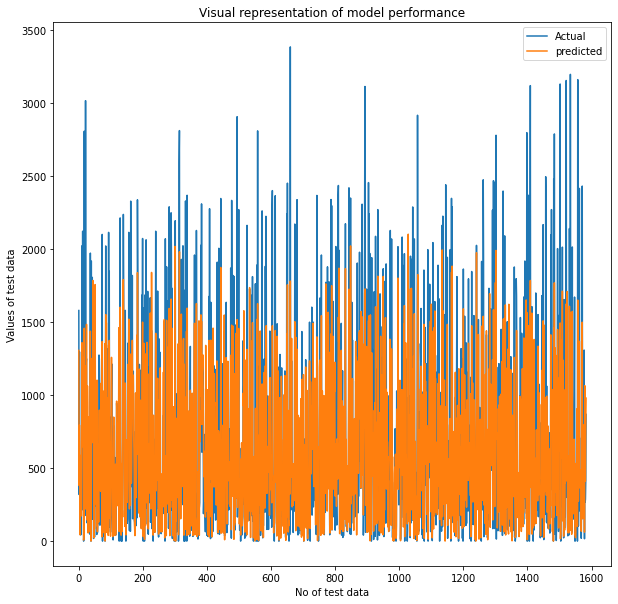

In [114]:
# Visual representation of model performance.
plt.figure(figsize = (10,10))
plt.plot(y_test**2)
plt.plot(gridsearch_lasso_y_test_predict**2)
plt.title('Visual representation of model performance')
plt.xlabel('No of test data')
plt.ylabel('Values of test data')
plt.legend(['Actual','predicted'])

### *Hypertuning for Ridge Regression.*

In [115]:
# Implementing Hypertuning for ridge regression.
grid_ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
gridsearch_ridge = GridSearchCV(grid_ridge, parameters, scoring = 'r2',cv = 10, verbose = 5) # instantiating gridsearch.
gridsearch_ridge.fit(X_train,y_train)   # Fitting the best parameters to the model.

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END ......................alpha=1e-15;, score=0.681 total time=   0.0s
[CV 2/10] END ......................alpha=1e-15;, score=0.701 total time=   0.0s
[CV 3/10] END ......................alpha=1e-15;, score=0.683 total time=   0.0s
[CV 4/10] END ......................alpha=1e-15;, score=0.692 total time=   0.0s
[CV 5/10] END ......................alpha=1e-15;, score=0.669 total time=   0.0s
[CV 6/10] END ......................alpha=1e-15;, score=0.725 total time=   0.0s
[CV 7/10] END ......................alpha=1e-15;, score=0.694 total time=   0.0s
[CV 8/10] END ......................alpha=1e-15;, score=0.735 total time=   0.0s
[CV 9/10] END ......................alpha=1e-15;, score=0.738 total time=   0.0s
[CV 10/10] END .....................alpha=1e-15;, score=0.741 total time=   0.0s
[CV 1/10] END ......................alpha=1e-10;, score=0.681 total time=   0.0s
[CV 2/10] END ......................alpha=1e-1

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='r2', verbose=5)

In [116]:
# The best parameters and the best score
print("The best fit alpha value is found out to be :" ,gridsearch_ridge.best_params_)
print("\nUsing ",gridsearch_ridge.best_params_, " the best r2 score is:", gridsearch_ridge.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the best r2 score is: 0.7059746403308549


In [117]:
# Making predictions test using the best found parameter.
gridsearch_ridge_y_test_predict = gridsearch_ridge.predict(X_test)

In [118]:
# Printing all the metrics at alpha = 0.01
r2_test_gridsearch_ridge = r2_score(y_test**2,gridsearch_ridge_y_test_predict**2)
print('R2 score: ',r2_test_gridsearch_ridge)

adjusted_r2_test_gridsearch_ridge = (1-(1-r2_score((y_test**2), (gridsearch_ridge_y_test_predict**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 score: ', adjusted_r2_test_gridsearch_ridge)

mse_test_gridsearch_ridge = mean_squared_error(y_test**2,gridsearch_ridge_y_test_predict**2)
print('MSE: ',mse_test_gridsearch_ridge)

mae_test_gridsearch_ridge = mean_absolute_error(y_test**2,gridsearch_ridge_y_test_predict**2)
print('MAE: ',mae_test_gridsearch_ridge)

R2 score:  0.683367768405857
Adjusted R2 score:  0.6776663520170236
MSE:  143179.59607064526
MAE:  254.10442702847928


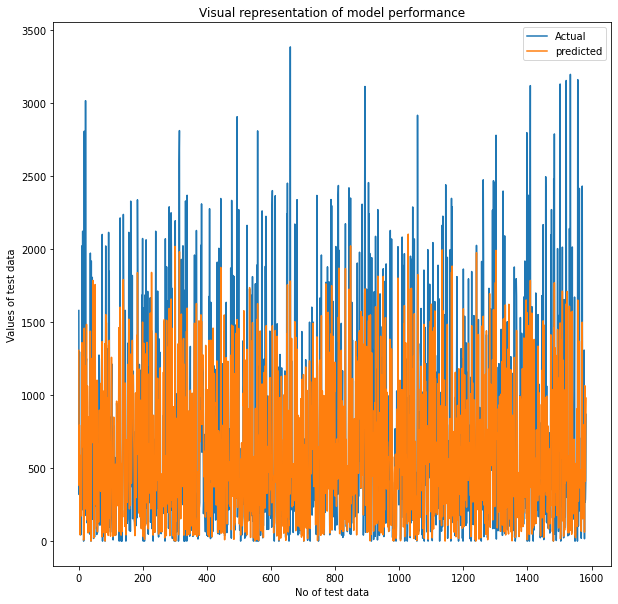

In [119]:
# Visual representation of model performance.
plt.figure(figsize = (10,10))
plt.plot(y_test**2)
plt.plot(gridsearch_ridge_y_test_predict**2)
plt.title('Visual representation of model performance')
plt.xlabel('No of test data')
plt.ylabel('Values of test data')
plt.legend(['Actual','predicted'])

###*Hyper tuning for Elastic Net.*

In [120]:
# Implementing Hypertuning for ridge regression.
grid_elasticnet = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
gridsearch_elasticnet = GridSearchCV(grid_elasticnet, parameters, scoring = 'r2',cv = 10, verbose = 5) # instantiating gridsearch.
gridsearch_elasticnet.fit(X_train,y_train)   # Fitting the best parameters to the model.

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV 1/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.681 total time=   0.2s
[CV 2/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.701 total time=   0.3s
[CV 3/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.683 total time=   0.3s
[CV 4/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.692 total time=   0.3s
[CV 5/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.669 total time=   0.2s
[CV 6/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.725 total time=   0.2s
[CV 7/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.694 total time=   0.2s
[CV 8/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.735 total time=   0.3s
[CV 9/10] END ........alpha=1e-15, l1_ratio=0.3;, score=0.738 total time=   0.3s
[CV 10/10] END .......alpha=1e-15, l1_ratio=0.3;, score=0.741 total time=   0.3s
[CV 1/10] END ........alpha=1e-15, l1_ratio=0.4;, score=0.681 total time=   0.2s
[CV 2/10] END ........alpha=1e-15, l1_ratio=

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='r2', verbose=5)

In [121]:
# The best parameters and the best score
print("The best fit alpha value is found out to be :" ,gridsearch_elasticnet.best_params_)
print("\nUsing ",gridsearch_elasticnet.best_params_, " the best r2 score is:", gridsearch_elasticnet.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.5}

Using  {'alpha': 0.0001, 'l1_ratio': 0.5}  the best r2 score is: 0.7059777235291823


In [122]:
# Making predictions test using the best found parameter.
gridsearch_elasticnet_y_test_predict = gridsearch_elasticnet.predict(X_test)

In [123]:
# Printing all the metrics at alpha = 0.01
r2_test_gridsearch_elasticnet = r2_score(y_test**2,gridsearch_elasticnet_y_test_predict**2)
print('R2 score: ',r2_test_gridsearch_elasticnet)

adjusted_r2_test_gridsearch_elasticnet = (1-(1-r2_score((y_test**2), (gridsearch_elasticnet_y_test_predict**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 score: ', adjusted_r2_test_gridsearch_elasticnet)

mse_test_gridsearch_elasticnet = mean_squared_error(y_test**2,gridsearch_elasticnet_y_test_predict**2)
print('MSE: ',mse_test_gridsearch_elasticnet)

mae_test_gridsearch_elasticnet = mean_absolute_error(y_test**2,gridsearch_elasticnet_y_test_predict**2)
print('MAE: ',mae_test_gridsearch_elasticnet)

R2 score:  0.6830912278272252
Adjusted R2 score:  0.6773848319295804
MSE:  143304.64641105526
MAE:  254.23945875475704


###*Comparing the performance of CrossValidated Linear Regression, Hypertuned Lasso, Hypertuned Ridge, Hypertuned ElasticNet.*

In [124]:
# Creating a dataframe to compare the models.
hypertuned_performance = pd.DataFrame({'Model':['Linear Regression', 'Lasso Regression','Ridge Regression','ElasticNet Regression'],
                                       'R2 Score':[avg_per,r2_test_gridsearch_lasso,r2_test_gridsearch_ridge,r2_test_gridsearch_elasticnet]})
hypertuned_performance

,Model,R2 Score
0,Linear Regression,0.705737
1,Lasso Regression,0.683341
2,Ridge Regression,0.683368
3,ElasticNet Regression,0.683091


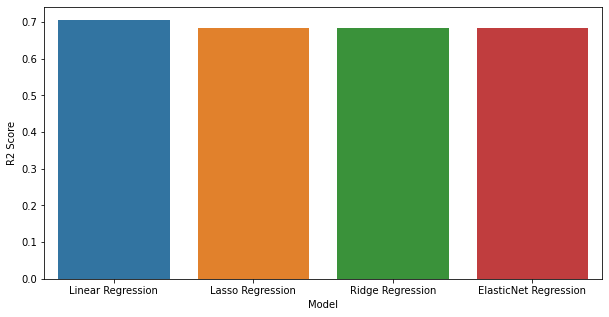

In [125]:
# Barchart of the above dataframe.
plt.figure(figsize = (10,5))
sns.barplot(x = hypertuned_performance['Model'], y = hypertuned_performance['R2 Score'])

As expected, the linear regression model only performed well when compared to other models because it wasn't not an overfitting model for regularised linear regression to penalize on.

##**Conclusion.**

We started the project by identifying what are continous numeric variables, discrete numeric variables, and also categorical variables. Then, we did some data preprocessing steps like duplicate value removal, null value removal. Then, we moved onto EDA, transformed the dependent variable, worked on the continous variables, transformed discrete numeric variables into categorical, worked on the categorical variables.

We implemented 4 models: Linear Regression, Lasso Regression, Ridge Regression, ElasticNet Regression and also Hypertuned the models to find out the best parameters.

**My thoughts on the models:**

* After implementing 4 different models on the dataset I came to the conclusion that the data is complex for the linear and regularised regression to understand the patterns. One must use more complex models like random forrest, XGBoost to get better results.

* I had a hunch from the begining that the linear regression and regularised regression might not relatively perform well. So I have engineered a lot of features like 'Is_raining','Is_raining' etc... to not loose on any data that has been provided in the dataset.

* The best performing model among the 4 models is Linear Regression. This makes sense because the model that we have built using Linear Regression by not overfitting for the regularised regression to penalise.

